In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("sales_data_analytics_assignment.csv")


In [3]:
# Check missing values
print(df.isnull().sum())


OrderID              0
Region               0
Product_Category     0
Sales_Amount        10
Profit              10
Discount             0
Customer_Rating      0
dtype: int64


In [4]:
# Fill missing values with median
df["Sales_Amount"].fillna(df["Sales_Amount"].median(), inplace=True)
df["Profit"].fillna(df["Profit"].median(), inplace=True)


C:\Users\DIGITECH\AppData\Local\Temp\ipykernel_16720\2459431818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sales_Amount"].fillna(df["Sales_Amount"].median(), inplace=True)
C:\Users\DIGITECH\AppData\Local\Temp\ipykernel_16720\2459431818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [5]:
# Outlier handling using IQR
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column.clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

df["Sales_Amount"] = remove_outliers(df["Sales_Amount"])
df["Profit"] = remove_outliers(df["Profit"])

In [6]:
# Q2: Descriptive Statistics


desc_stats = df[["Sales_Amount", "Profit", "Customer_Rating"]].describe()
print(desc_stats)

# Mode
print(df.mode().iloc[0])


       Sales_Amount       Profit  Customer_Rating
count    200.000000   200.000000       200.000000
mean    5054.714600   782.013538         2.870000
std     1369.902688   398.174153         1.457298
min     1313.600000  -188.660000         1.000000
25%     4091.240000   499.822500         2.000000
50%     5077.835000   778.840000         3.000000
75%     5943.000000  1030.672500         4.000000
max     8720.640000  1826.947500         5.000000
OrderID                    1001
Region                     East
Product_Category    Electronics
Sales_Amount           5077.835
Profit                   778.84
Discount                   10.0
Customer_Rating             1.0
Name: 0, dtype: object


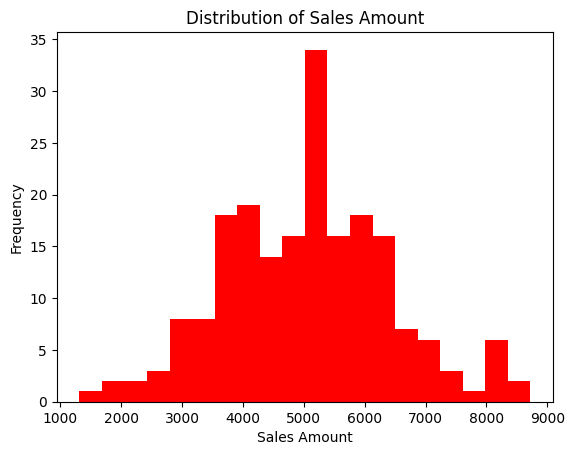

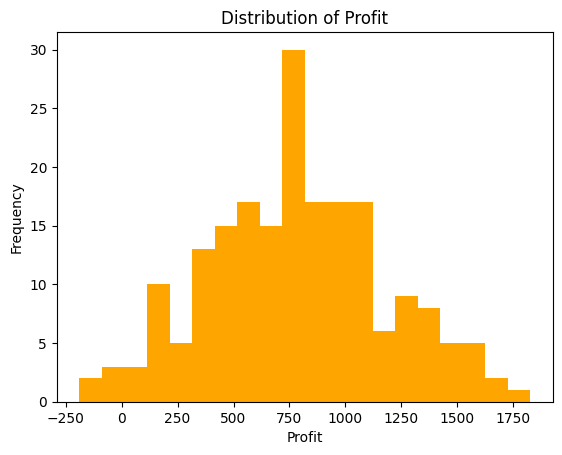

In [7]:
# Q3: Univariate Analysis
# -------------------------------

plt.figure()
plt.hist(df["Sales_Amount"], bins=20, color='red')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df["Profit"], bins=20, color='orange')
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


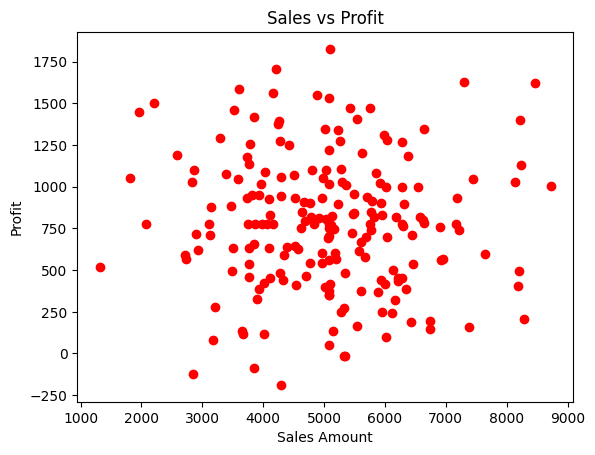

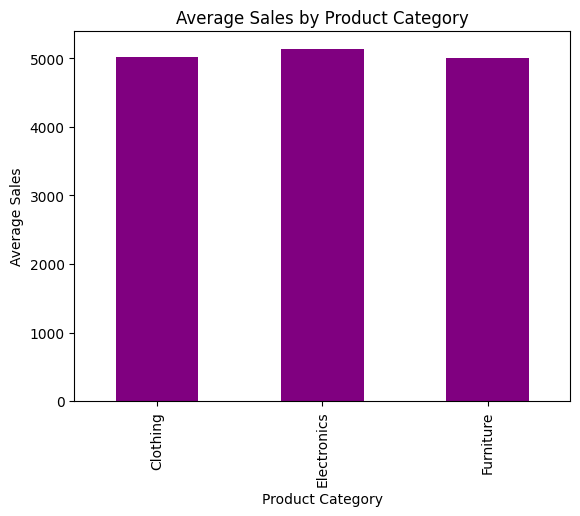

In [8]:
# Q3: Bivariate Analysis

plt.figure()
plt.scatter(df["Sales_Amount"], df["Profit"], color='red')
plt.title("Sales vs Profit")
plt.xlabel("Sales Amount")
plt.ylabel("Profit")
plt.show()

# Categorical vs Numerical
plt.figure()
df.groupby("Product_Category")["Sales_Amount"].mean().plot(kind='bar',color='purple')
plt.title("Average Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Sales")
plt.show()


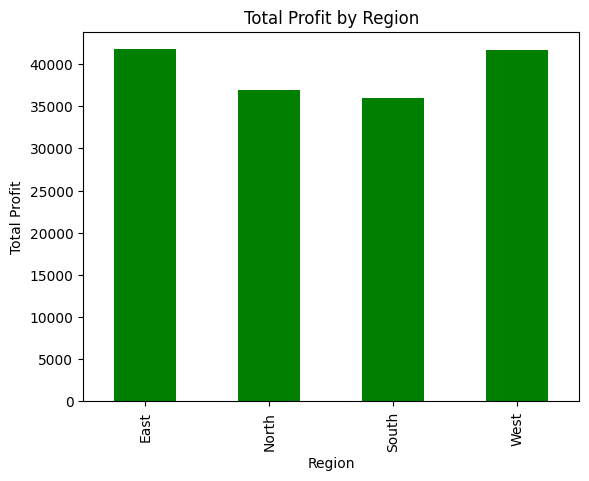

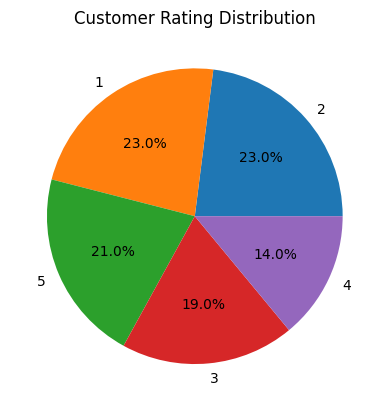

Key Insights:
1. Electronics category generates higher average sales.
2. Higher sales strongly correlate with higher profit.
3. Certain regions outperform others in total profit.


In [9]:
# Q4: Dashboard-style Visualizations
# -------------------------------

plt.figure()
df.groupby("Region")["Profit"].sum().plot(kind="bar", color='green')
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

plt.figure()
df["Customer_Rating"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Customer Rating Distribution")
plt.ylabel("")
plt.show()

# -------------------------------
# Insights
# -------------------------------
print("Key Insights:")
print("1. Electronics category generates higher average sales.")
print("2. Higher sales strongly correlate with higher profit.")
print("3. Certain regions outperform others in total profit.")

In [10]:
pip install streamlit pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\DIGITECH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2026-02-12 18:54:36.832 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 18:54:36.833 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 18:54:37.809 
  command:

    streamlit run C:\Users\DIGITECH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-12 18:54:37.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 18:54:37.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 18:54:37.811 No runtime found, using MemoryCacheStorageManager
2026-02-12 18:54:37.812 No runtime found, using MemoryCacheSt

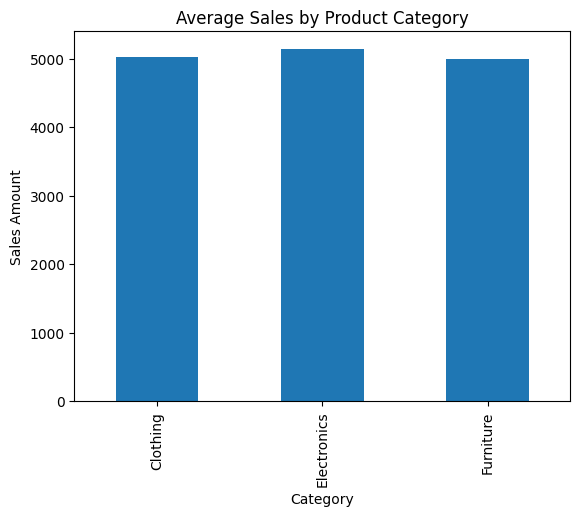

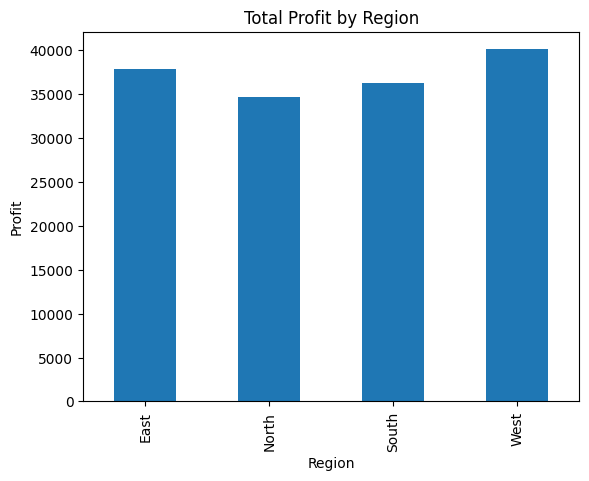

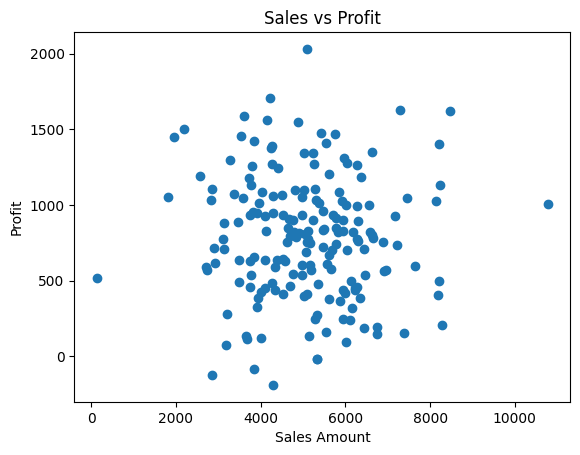

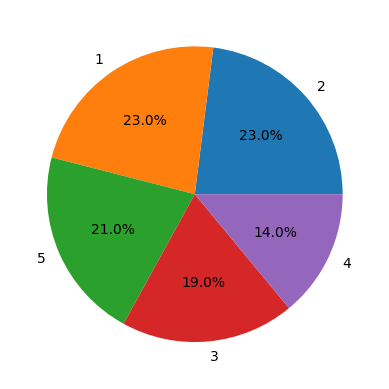

In [11]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Page config
st.set_page_config(page_title="Sales Analytics Dashboard", layout="wide")

# Title
st.title("📊 Sales Data Analytics Dashboard")

# Load dataset
@st.cache_data
def load_data():
    return pd.read_csv("sales_data_analytics_assignment.csv")

df = load_data()

# Sidebar filters
st.sidebar.header("🔎 Filter Options")

region_filter = st.sidebar.multiselect(
    "Select Region",
    options=df["Region"].unique(),
    default=df["Region"].unique()
)

category_filter = st.sidebar.multiselect(
    "Select Product Category",
    options=df["Product_Category"].unique(),
    default=df["Product_Category"].unique()
)

filtered_df = df[
    (df["Region"].isin(region_filter)) &
    (df["Product_Category"].isin(category_filter))
]

# -------------------------
# KPIs
# -------------------------
st.subheader("📌 Key Performance Indicators")

col1, col2, col3 = st.columns(3)

col1.metric("Total Sales", f"₹ {filtered_df['Sales_Amount'].sum():,.0f}")
col2.metric("Total Profit", f"₹ {filtered_df['Profit'].sum():,.0f}")
col3.metric("Average Rating", round(filtered_df["Customer_Rating"].mean(), 2))

# -------------------------
# Visualizations
# -------------------------
st.subheader("📈 Visual Analysis")

col4, col5 = st.columns(2)

# Sales by Category
with col4:
    fig1, ax1 = plt.subplots()
    filtered_df.groupby("Product_Category")["Sales_Amount"].mean().plot(kind="bar", ax=ax1)
    ax1.set_title("Average Sales by Product Category")
    ax1.set_xlabel("Category")
    ax1.set_ylabel("Sales Amount")
    st.pyplot(fig1)

# Profit by Region
with col5:
    fig2, ax2 = plt.subplots()
    filtered_df.groupby("Region")["Profit"].sum().plot(kind="bar", ax=ax2)
    ax2.set_title("Total Profit by Region")
    ax2.set_xlabel("Region")
    ax2.set_ylabel("Profit")
    st.pyplot(fig2)

# Scatter plot
st.subheader("📉 Sales vs Profit Relationship")
fig3, ax3 = plt.subplots()
ax3.scatter(filtered_df["Sales_Amount"], filtered_df["Profit"])
ax3.set_xlabel("Sales Amount")
ax3.set_ylabel("Profit")
ax3.set_title("Sales vs Profit")
st.pyplot(fig3)

# Rating distribution
st.subheader("⭐ Customer Rating Distribution")
fig4, ax4 = plt.subplots()
filtered_df["Customer_Rating"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax4)
ax4.set_ylabel("")
st.pyplot(fig4)

# -------------------------  
# Insights
# -------------------------
st.subheader("🧠 Key Insights")

st.write("""
1️⃣ Electronics category shows higher average sales compared to others.  
2️⃣ There is a positive relationship between Sales Amount and Profit.  
3️⃣ Some regions consistently generate higher profit, indicating strong regional performance.  
4️⃣ Majority of customers give ratings between 3 and 5, indicating overall satisfaction.
""")
